In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Load the dataset
file_path = r'./Maintenance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1     31   -0.0006    0.0004     100.0  518.67  642.58  1581.22  1398.91   
1   2     49    0.0018   -0.0001     100.0  518.67  642.55  1586.59  1410.83   
2   3    126   -0.0016    0.0004     100.0  518.67  642.88  1589.75  1418.89   
3   4    106    0.0012    0.0004     100.0  518.67  642.78  1594.53  1406.88   
4   5     98   -0.0013   -0.0004     100.0  518.67  642.27  1589.94  1419.36   

      s5  ...      sd15  sd16      sd17  sd18  sd19      sd20      sd21  ttf  \
0  14.62  ...  0.021174   0.0  0.707107   0.0   0.0  0.124016  0.025037  112   
1  14.62  ...  0.011429   0.0  1.095445   0.0   0.0  0.069785  0.027820   98   
2  14.62  ...  0.030924   0.0  0.836660   0.0   0.0  0.143631  0.018966   69   
3  14.62  ...  0.021249   0.0  1.341641   0.0   0.0  0.126372  0.021106   82   
4  14.62  ...  0.009627   0.0  0.547723   0.0   0.0  0.091924  0.101100   91   

   label_bnc  label_mcc  
0          0

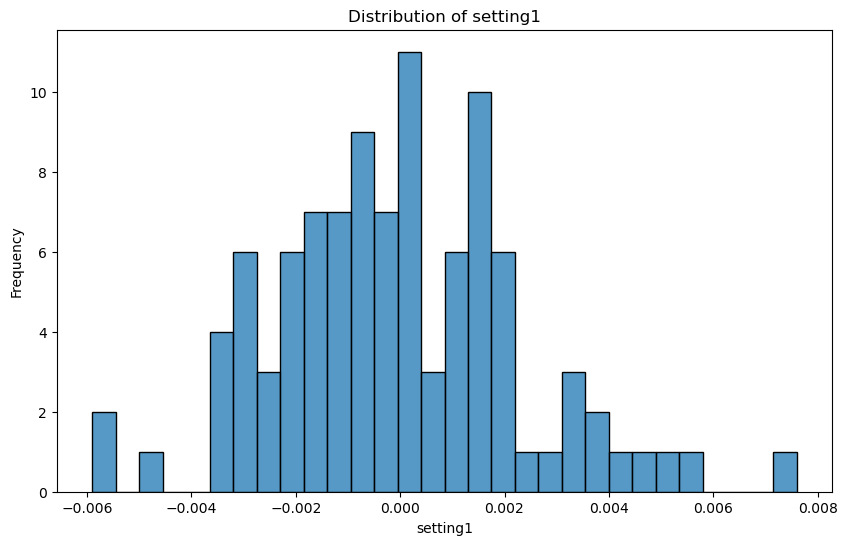

In [3]:
# Visualize the data for 'setting1'
plt.figure(figsize=(10, 6))
sns.histplot(data['setting1'], bins=30)
plt.title('Distribution of setting1')
plt.xlabel('setting1')
plt.ylabel('Frequency')
plt.show()


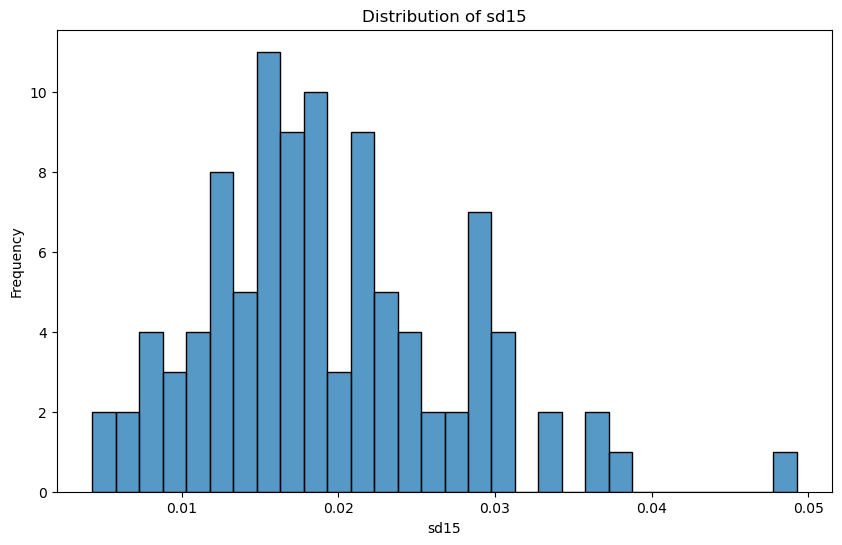

In [4]:
# Visualize the data for 'sd15'
plt.figure(figsize=(10, 6))
sns.histplot(data['sd15'], bins=30)
plt.title('Distribution of sd15')
plt.xlabel('sd15')
plt.ylabel('Frequency')
plt.show()


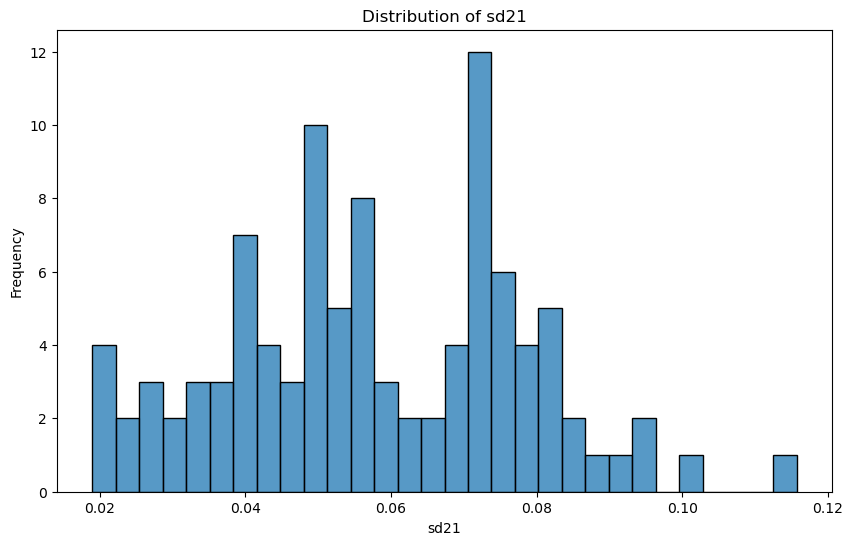

In [5]:
# Visualize the data for 'sd21'
plt.figure(figsize=(10, 6))
sns.histplot(data['sd21'], bins=30)
plt.title('Distribution of sd21')
plt.xlabel('sd21')
plt.ylabel('Frequency')
plt.show()

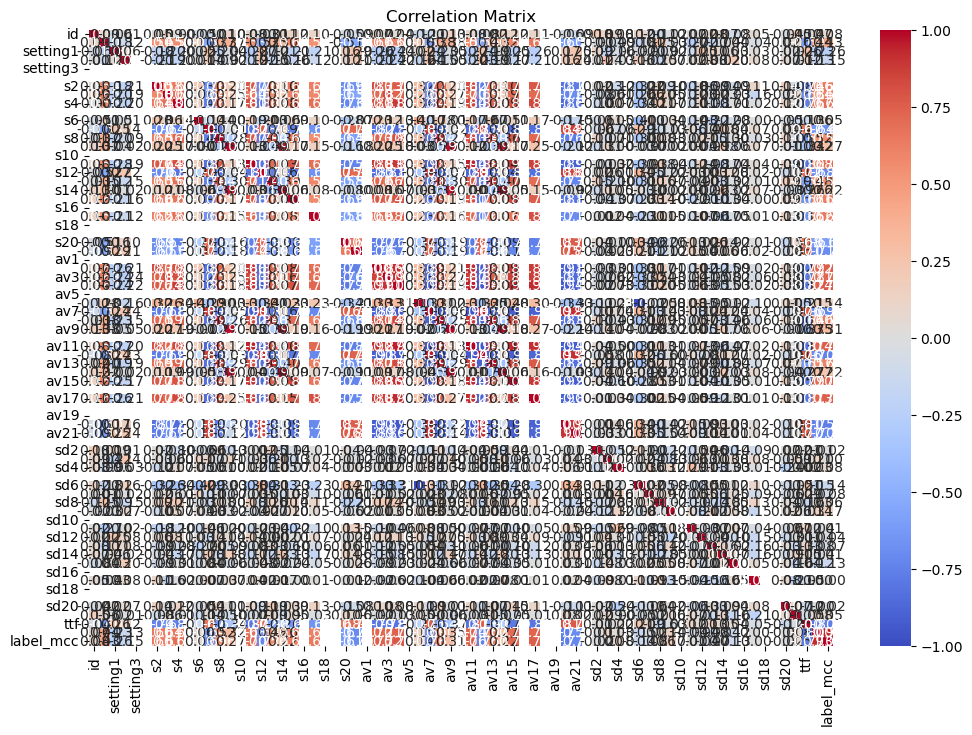

In [ ]:
# Visualize the Correlation Between Features: Create a heatmap to visualize the correlation between features.
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Prepare Data for Linear Regression: Split your data into features and target variable, and then into training and testing sets.
# Assuming 'target' is your target variable
X = data.drop('setting1', axis=1) 
y = data['setting1']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Do Prediction: Fit a linear regression model and make predictions. Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Display predictions
print(predictions)

[ 0.00097656 -0.00585938 -0.00488281  0.00146484  0.00097656 -0.00097656
  0.00048828  0.00341797  0.00048828  0.00195312 -0.00390625 -0.00439453
 -0.00244141 -0.00097656  0.00244141  0.00390625  0.00097656 -0.00244141
  0.00048828  0.0078125 ]


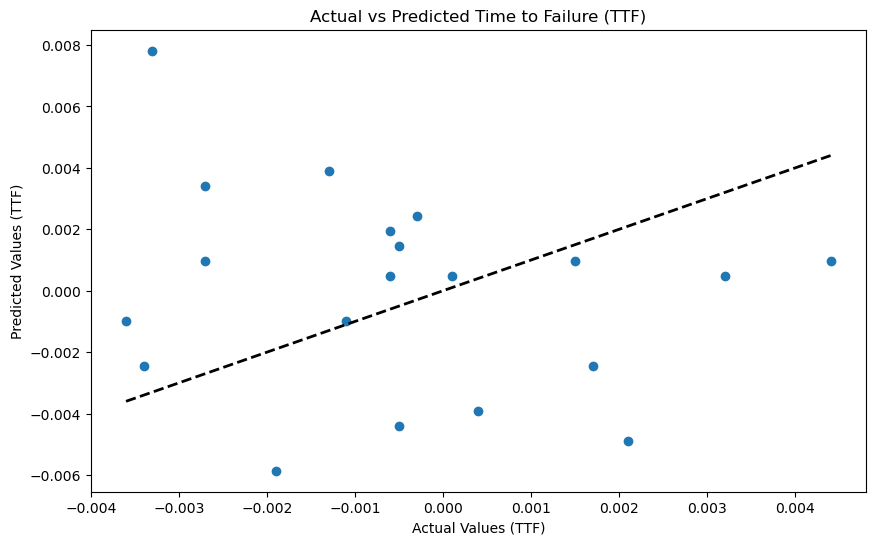

In [9]:
# Plot Linear Regression Features: Visualize the linear regression results.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values (TTF)')
plt.ylabel('Predicted Values (TTF)')
plt.title('Actual vs Predicted Time to Failure (TTF)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

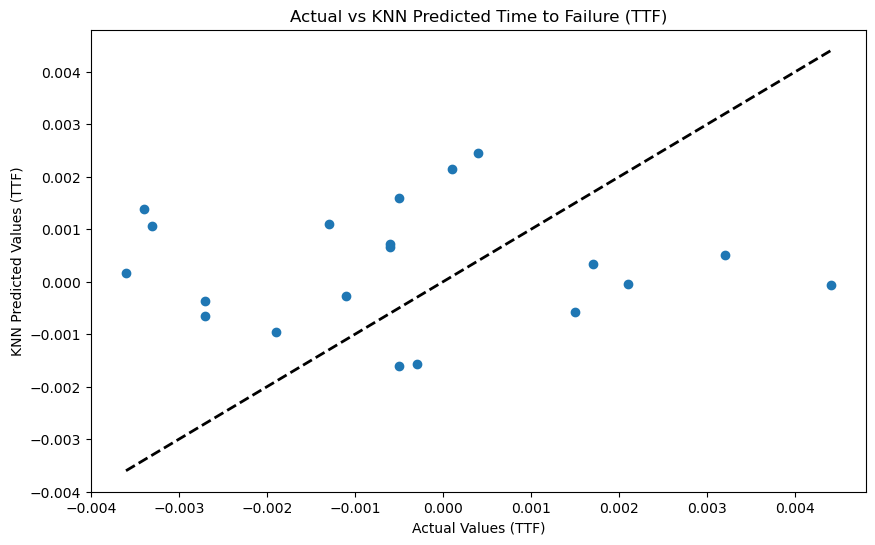

In [10]:
# Create and fit the KNN model: Fit a K-Nearest Neighbors model and visualize the results.
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Visualize KNN predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions)
plt.xlabel('Actual Values (TTF)')
plt.ylabel('KNN Predicted Values (TTF)')
plt.title('Actual vs KNN Predicted Time to Failure (TTF)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()